# Exploratory Data Analysis (EDA)

In this notebook, we will replicate the Exploratory Data Analysis (EDA) performed during the previous workshop session, all while adhering to software engineering best practices. To streamline and automate repetitive tasks, we leverage the *bank_marketing* library we are currently developing, ensuring a more efficient and organized EDA process.

In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from bank_marketing.data.make_datasets import make_bank_marketing_dataframe
from bank_marketing.visualization.dataframe_explore import report_columns_inspection

### Creation of a Dataframe from the bank database and socio-economical data
Following the module `bank_marketing.data.make_datasets` documentation, use the `make_bank_marketing_dataframe` to create the dataframe `df`, filter the columns using the below-provided selection, save the dataframe into the `data/raw` folder as csv file.

In [2]:
columns = ['age', 'job', 'marital', 'education', 'comm_month',
       'comm_day', 'comm_type', 'comm_duration', 'curr_n_contact', 'days_since_last_campaign', 'last_n_contact',
       'last_outcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'housing', 'loan',
       'default', 'curr_outcome']

In [3]:
df = make_bank_marketing_dataframe("../data/bank_marketing.db", 
                                   "../data/external/socio_economic_indices_data.csv")

**Starting from the following cell:** You have to implement the `inspect_columns` logic function defined in the module `bank_marketing.visualization.dataframe_explore` because it is the backbone of the reporting function `report_columns_inspection` that we will be using in the next cells.

### Checking for categorical values
In the next cells, re-implement the checks of categorical columns using the `report_columns_inspection`.

In [4]:
# inspect the column: job
report_columns_inspection(df, columns=['job'])

+--------+---------------+---------------+--------------+--------------+
| Column | options_count |  options_set  | values_count | values_ratio |
+--------+---------------+---------------+--------------+--------------+
|  job   |       12      |   housemaid   |     1040     |     0.03     |
|   -    |       -       |    services   |     3916     |     0.1      |
|   -    |       -       |     admin.    |    10158     |     0.25     |
|   -    |       -       |  blue-collar  |     9206     |     0.23     |
|   -    |       -       |   technician  |     6602     |     0.16     |
|   -    |       -       |    retired    |     1605     |     0.04     |
|   -    |       -       |   management  |     2872     |     0.07     |
|   -    |       -       |   unemployed  |     980      |     0.02     |
|   -    |       -       | self-employed |     1402     |     0.03     |
|   -    |       -       |    unknown    |     325      |     0.01     |
|   -    |       -       |  entrepreneur |     1443

In [5]:
# inspect the column: curr_outcome
report_columns_inspection(df, columns=['curr_outcome'])

+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |    36101     |     0.9      |
|      -       |       -       |     yes     |     4219     |     0.1      |
+--------------+---------------+-------------+--------------+--------------+


<Axes: xlabel='curr_n_contact', ylabel='Count'>

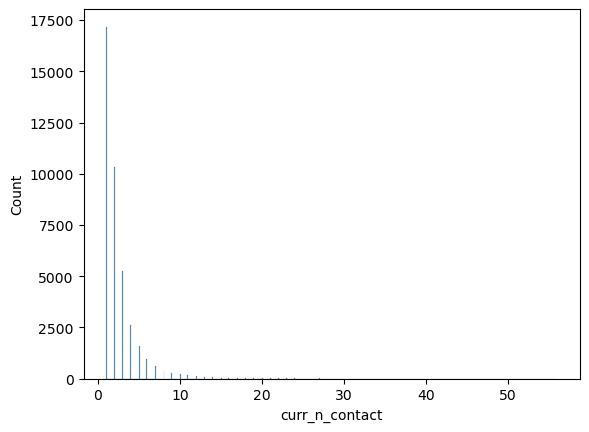

In [6]:
sns.histplot(df.curr_n_contact)

## A Closer Look at Some DataFrame Columns
In the next cells, re-implement the different checks on certain columns of interest by filtering the dataframe and apply the columns inspection `report_columns_inspection`.

### Examining duration

In [7]:
# inspect the columns: comm_duration, curr_n_contact for rows with comm_duration < 1
report_columns_inspection(df[df.comm_duration < 1], columns=['comm_duration', 'curr_n_contact'])

+----------------+-------+------+------+-----+------+-----+-----+------+
|     Column     | count | mean | std  | min | 25%  | 50% | 75% | max  |
+----------------+-------+------+------+-----+------+-----+-----+------+
| comm_duration  |  4.0  | 0.0  | 0.0  | 0.0 | 0.0  | 0.0 | 0.0 | 0.0  |
| curr_n_contact |  4.0  | 4.75 | 3.59 | 2.0 | 2.75 | 3.5 | 5.5 | 10.0 |
+----------------+-------+------+------+-----+------+-----+-----+------+


In [8]:
# inspect the columns: comm_duration, curr_n_contact for rows with comm_duration == 0
report_columns_inspection(df[df.comm_duration == 0], columns=['comm_duration', 'curr_outcome']) 

+---------------+-------+------+-----+-----+-----+-----+-----+-----+
|     Column    | count | mean | std | min | 25% | 50% | 75% | max |
+---------------+-------+------+-----+-----+-----+-----+-----+-----+
| comm_duration |  4.0  | 0.0  | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
+---------------+-------+------+-----+-----+-----+-----+-----+-----+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       1       |      no     |      4       |     1.0      |
+--------------+---------------+-------------+--------------+--------------+


In [9]:
# inspect the columns: comm_duration, curr_n_contact for rows with comm_duration <= 900
report_columns_inspection(df[df.comm_duration <= 900], columns=['comm_duration', 'curr_outcome']) 

+---------------+---------+--------+--------+-----+------+-------+-------+-------+
|     Column    |  count  |  mean  |  std   | min | 25%  |  50%  |  75%  |  max  |
+---------------+---------+--------+--------+-----+------+-------+-------+-------+
| comm_duration | 39068.0 | 225.49 | 177.21 | 0.0 | 99.0 | 173.0 | 298.0 | 900.0 |
+---------------+---------+--------+--------+-----+------+-------+-------+-------+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |    35586     |     0.91     |
|      -       |       -       |     yes     |     3482     |     0.09     |
+--------------+---------------+-------------+--------------+--------------+


In [10]:
# inspect the columns: comm_duration, curr_n_contact for rows with comm_duration >= 900
report_columns_inspection(df[df.comm_duration >= 900], columns=['comm_duration', 'curr_outcome']) 

+---------------+--------+---------+--------+-------+-------+--------+--------+--------+
|     Column    | count  |   mean  |  std   |  min  |  25%  |  50%   |  75%   |  max   |
+---------------+--------+---------+--------+-------+-------+--------+--------+--------+
| comm_duration | 1255.0 | 1247.96 | 401.66 | 900.0 | 997.0 | 1131.0 | 1346.0 | 4918.0 |
+---------------+--------+---------+--------+-------+-------+--------+--------+--------+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |     516      |     0.41     |
|      -       |       -       |     yes     |     739      |     0.59     |
+--------------+---------------+-------------+--------------+--------------+


<Axes: >

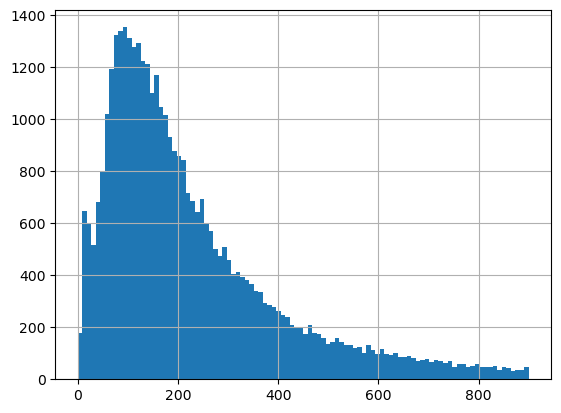

In [11]:
df.comm_duration[df.comm_duration <= 900].hist(bins=100)

### Examining previous contacts

In [12]:
# inspect the columns: last_n_contact, curr_outcome for rows with last_n_contact > 0
report_columns_inspection(df[df.last_n_contact > 0], columns=['last_n_contact', 'curr_outcome']) 

+----------------+--------+------+-----+-----+-----+-----+-----+-----+
|     Column     | count  | mean | std | min | 25% | 50% | 75% | max |
+----------------+--------+------+-----+-----+-----+-----+-----+-----+
| last_n_contact | 5105.0 | 1.19 | 0.5 | 1.0 | 1.0 | 1.0 | 1.0 | 5.0 |
+----------------+--------+------+-----+-----+-----+-----+-----+-----+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |     3888     |     0.76     |
|      -       |       -       |     yes     |     1217     |     0.24     |
+--------------+---------------+-------------+--------------+--------------+


### Examining previous campaigns

In [13]:
# inspect the columns: last_outcome, curr_outcome for rows with (days_since_last_campaign == 999) and last_outcome != 'nonexistent'
report_columns_inspection(df[(df.days_since_last_campaign == 999) & (df.last_outcome != 'nonexistent')], columns=['last_outcome', 'curr_outcome']) 

+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| last_outcome |       1       |   failure   |     3910     |     1.0      |
| curr_outcome |       2       |      no     |     3425     |     0.88     |
|      -       |       -       |     yes     |     485      |     0.12     |
+--------------+---------------+-------------+--------------+--------------+


In [14]:
# inspect the column: curr_outcome for rows with (days_since_last_campaign == 999) and last_outcome == 'failure'
report_columns_inspection(df[(df.days_since_last_campaign == 999) & (df.last_outcome == 'failure')], columns=['curr_outcome']) 

+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |     3425     |     0.88     |
|      -       |       -       |     yes     |     485      |     0.12     |
+--------------+---------------+-------------+--------------+--------------+


In [15]:
# inspect the columns: days_since_last_campaign, curr_outcome for rows with last_outcome == 'nonexistent'
report_columns_inspection(df[df.last_outcome == 'nonexistent'], columns=['days_since_last_campaign','curr_outcome']) 

+--------------------------+---------+-------+-----+-------+-------+-------+-------+-------+
|          Column          |  count  |  mean | std |  min  |  25%  |  50%  |  75%  |  max  |
+--------------------------+---------+-------+-----+-------+-------+-------+-------+-------+
| days_since_last_campaign | 35215.0 | 999.0 | 0.0 | 999.0 | 999.0 | 999.0 | 999.0 | 999.0 |
+--------------------------+---------+-------+-----+-------+-------+-------+-------+-------+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |    32213     |     0.91     |
|      -       |       -       |     yes     |     3002     |     0.09     |
+--------------+---------------+-------------+--------------+--------------+


In [16]:
# inspect the columns: curr_n_contact, last_outcome, curr_outcome for rows with days_since_last_campaign == 999
report_columns_inspection(df[df.days_since_last_campaign == 999], columns=['curr_n_contact', 'last_outcome', 'curr_outcome']) 

+----------------+---------+------+------+-----+-----+-----+-----+------+
|     Column     |  count  | mean | std  | min | 25% | 50% | 75% | max  |
+----------------+---------+------+------+-----+-----+-----+-----+------+
| curr_n_contact | 39125.0 | 2.61 | 2.82 | 1.0 | 1.0 | 2.0 | 3.0 | 56.0 |
+----------------+---------+------+------+-----+-----+-----+-----+------+
+--------------+---------------+-------------+--------------+--------------+
|    Column    | options_count | options_set | values_count | values_ratio |
+--------------+---------------+-------------+--------------+--------------+
| last_outcome |       2       | nonexistent |    35215     |     0.9      |
|      -       |       -       |   failure   |     3910     |     0.1      |
+--------------+---------------+-------------+--------------+--------------+
| curr_outcome |       2       |      no     |    35638     |     0.91     |
|      -       |       -       |     yes     |     3487     |     0.09     |
+-------------

<Axes: >

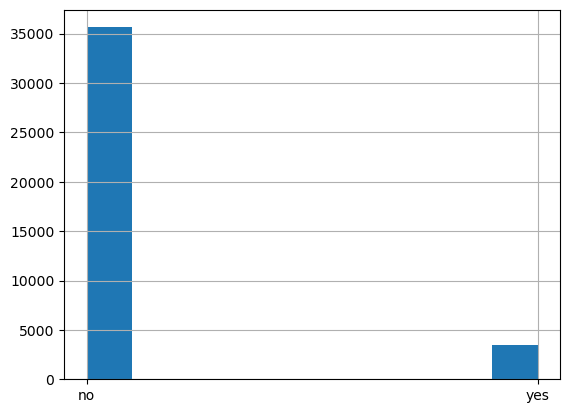

In [17]:
df[df.days_since_last_campaign == 999]['curr_outcome'].hist() 

<Axes: >

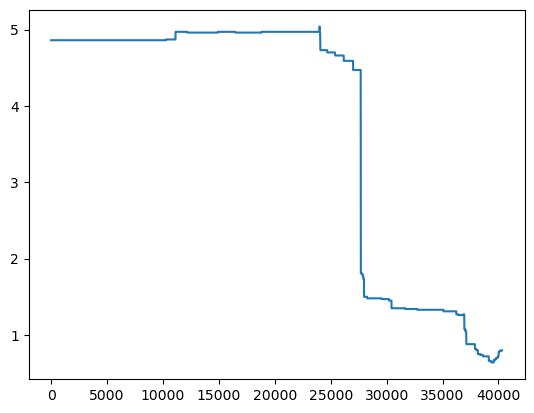

In [18]:
df.euribor3m.plot()

<Axes: >

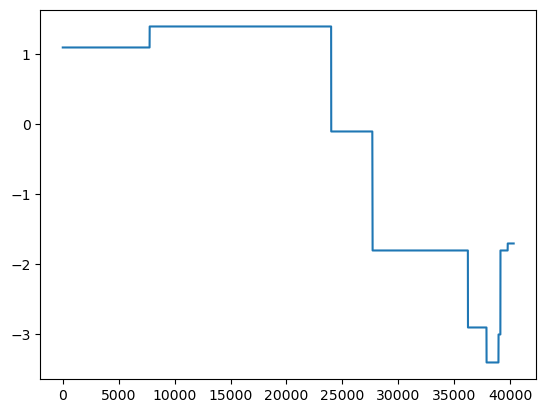

In [19]:
df['emp.var.rate'].plot()

<Axes: >

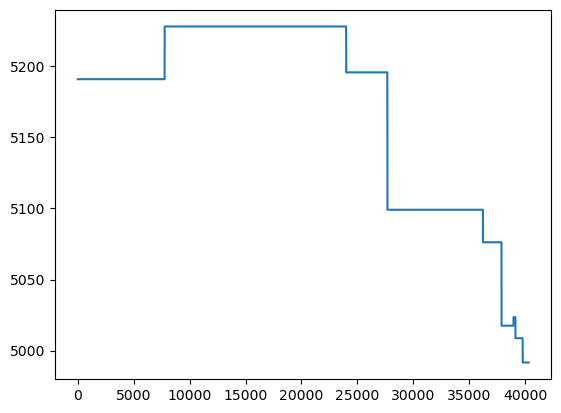

In [20]:
df['nr.employed'].plot()

<Axes: >

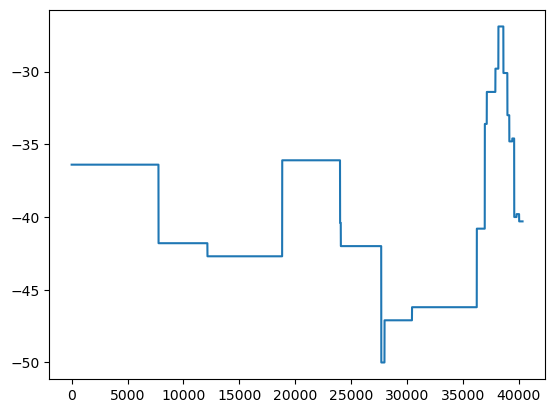

In [21]:
df['cons.conf.idx'].plot()

<Axes: >

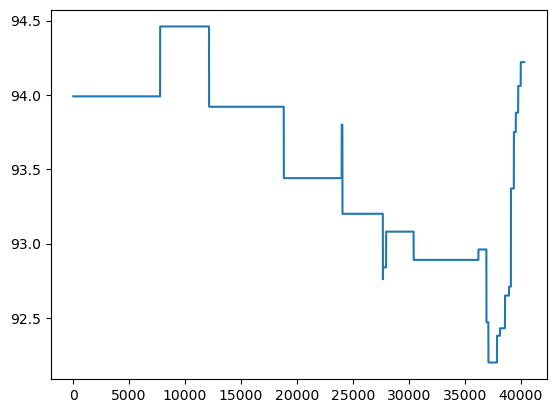

In [22]:
df['cons.price.idx'].plot()